In [50]:
%matplotlib inline
from argparse import ArgumentParser
import cv2 as cv
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal 
import librosa
from sound_from_video import *
#

In [9]:
  args = {
      "input_video": "../../VID_20200120_165221.mp4",
      "output" : "../../out" 
  }

vr = cv.VideoCapture(args['input_video'])
sr = round(vr.get(cv.CAP_PROP_FPS)) if  480 is None else 480
x, _ = sound_from_video(vr, 1, 2, downsample_factor=0.1, sampling_rate=sr)


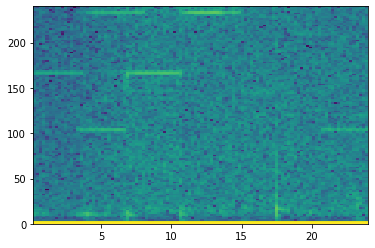

In [122]:

plt.figure()
plt.specgram(x, Fs=sr, noverlap= 200)
plt.show()

#wavfile.write(args.output, sr, x)

In [111]:
#wavfile.write(args['output'], sr, x)
def get_soud_spec_sub (x: np.array):
    _, _, st = signal.stft(x)
    # st is a tuple
    print(st.shape)

    
    stmags = np.multiply(np.abs(st), np.abs(st))
    print(stmags.shape)
    stangles = np.angle(st)
    print(stangles.shape)
    
    hold_col = np.quantile(stmags, 0.5, axis=1)
    print(hold_col.shape)
    
    for q in range(stmags.shape[1]):
        stmags[:, q] -= hold_col
        stmags [:, q] = np.maximum(stmags[:,q], 0)
    
    stmags = np.sqrt(stmags)
    newst = np.multiply(stmags, 1j * stangles)
    
    _, new_x = signal.istft(newst)
    
    maxsx = np.max(new_x)
    minsx = np.min(new_x)

    if maxsx != 1.0 or minsx != -1.0:
        rangesx = maxsx - minsx
        new_x = 2 * new_x / rangesx
        newmax = np.max(new_x)
        offset = newmax - 1.0
        new_x = new_x - offset
    
    return new_x
    
    
    
new_x = get_soud_spec_sub(x)


(129, 93)
(129, 93)
(129, 93)
(129,)


In [112]:
wavfile.write(args['output'] + "_denoising", sr, new_x)

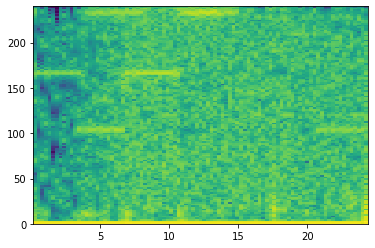

In [123]:

plt.figure()
plt.specgram(new_x, Fs=sr, noverlap= 200)
plt.show()